In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

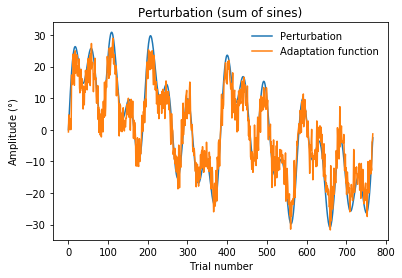

In [2]:
# let's create the perturbation, which is a sum of 5 different sine waves
k = np.array([1, 2, 4, 8, 16])
N = 768
n = np.linspace(0, N-1, N)
sine_in = np.zeros((len(k), N))
shifted_sinewave = np.zeros((len(k), N))

for i in range(len(k)):
    sine_in[i, :] = 10 * np.sin(2 * np.pi * k[i] * n / N)
    shifted_sinewave[i, 8:] = sine_in[i, 8:]
perturbation = sine_in.sum(axis=0)
y = 0.8 * shifted_sinewave.sum(axis=0) + 3.5 * np.random.randn(N)

# plot the perturbation
plt.plot(perturbation, label='Perturbation')
plt.xlabel('Trial number')
plt.ylabel('Amplitude ($\degree$)')
plt.title('Perturbation (sum of sines)');

# let's create something close to an ideal response
#y = perturbation + 3.5 * np.random.randn(N)
plt.plot(y, label='Adaptation function')
plt.legend(frameon=False);

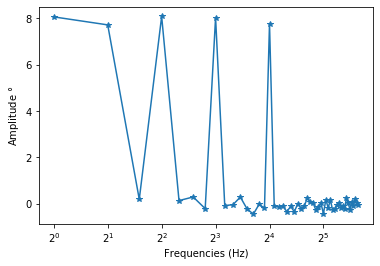

In [9]:
# we're going to regress the behavior onto sinusoids of every frequency up to N/2
# create design matrix
freqs = np.linspace(0, N/2-1, N//2)
X = np.zeros((N, len(freqs)))
for i in range(len(freqs)):
    X[:, i] = np.sin(2 * np.pi * freqs[i] * n / N)

# solve for optimal Beta
U, s, Vh = np.linalg.svd(X)
S_pound = linalg.diagsvd(1/s, X.shape[1], X.shape[0]) # must be same shape as S^T
Beta = Vh.T @ S_pound @ U.T @ y

# let's plot amplitudes of perturbed frequencies
plt.plot(freqs[1:51], Beta[1:51], marker='*')
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude $\degree$');

Text(0, 0.5, 'Amplitude')

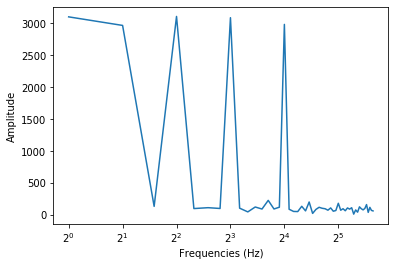

In [36]:
# compare regression results to FFT
y_FT = np.fft.fft(y)
plt.plot(freqs[1:51], np.abs(y_FT[1:51]))
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')

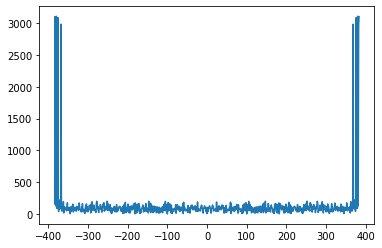

In [35]:
# playing around with fftshift function 
freqs = np.fft.fftfreq(len(y), d=1 / len(y))
shifted_freqs = np.fft.fftshift(freqs)
plt.plot(shifted_freqs, np.abs(y_FT))
# plt.xscale('log', basex=2)

In [30]:
np.fft.fftfreq(100, 1/100)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49., -50., -49., -48., -47., -46.,
       -45., -44., -43., -42., -41., -40., -39., -38., -37., -36., -35.,
       -34., -33., -32., -31., -30., -29., -28., -27., -26., -25., -24.,
       -23., -22., -21., -20., -19., -18., -17., -16., -15., -14., -13.,
       -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.])